<a href="https://colab.research.google.com/github/AnyasorG/Analytic-Bootcamp/blob/main/machine_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Step 1: Install the Kaggle API if not already installed
!pip install -q kaggle

# Step 2: Upload your Kaggle API key file (kaggle.json) to Google Colab
from google.colab import files
files.upload()  # Upload your Kaggle API key file (kaggle.json)

# Step 3: Move the uploaded kaggle.json file to the appropriate directory and set appropriate permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 4: Download the dataset using the Kaggle API command
!kaggle datasets download -d iammustafatz/diabetes-prediction-dataset



Saving kaggle.json to kaggle.json
diabetes-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip diabetes-prediction-dataset.zip


Archive:  diabetes-prediction-dataset.zip
replace diabetes_prediction_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: diabetes_prediction_dataset.csv  


In [ ]:
import pandas as pd

# Load the dataset into a Pandas DataFrame
df = pd.read_csv('diabetes_prediction_dataset.csv')

# Display the first few rows of the DataFrame
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
# Display basic information about the dataset
df.shape

(100000, 9)

In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
df['age'] = df['age'].astype(int)

# Display the data types to confirm the conversion
df.dtypes


gender                  object
age                      int64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [ ]:
# Display summary statistics of numerical columns
df.describe().round()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0,100000.0
mean,42.0,0.0,0.0,27.0,6.0,138.0,0.0
std,23.0,0.0,0.0,7.0,1.0,41.0,0.0
min,0.0,0.0,0.0,10.0,4.0,80.0,0.0
25%,24.0,0.0,0.0,24.0,5.0,100.0,0.0
50%,43.0,0.0,0.0,27.0,6.0,140.0,0.0
75%,60.0,0.0,0.0,30.0,6.0,159.0,0.0
max,80.0,1.0,1.0,96.0,9.0,300.0,1.0


In [ ]:
# Check for missing values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
# Check for duplicate rows
df.duplicated().sum()

3888

In [ ]:
duplicates = df[df.duplicated()]
duplicates.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80,0,0,No Info,27.32,6.6,159,0
3272,Female,80,0,0,No Info,27.32,3.5,80,0
3418,Female,19,0,0,No Info,27.32,6.5,100,0
3939,Female,78,1,0,former,27.32,3.5,130,0
3960,Male,47,0,0,No Info,27.32,6.0,200,0


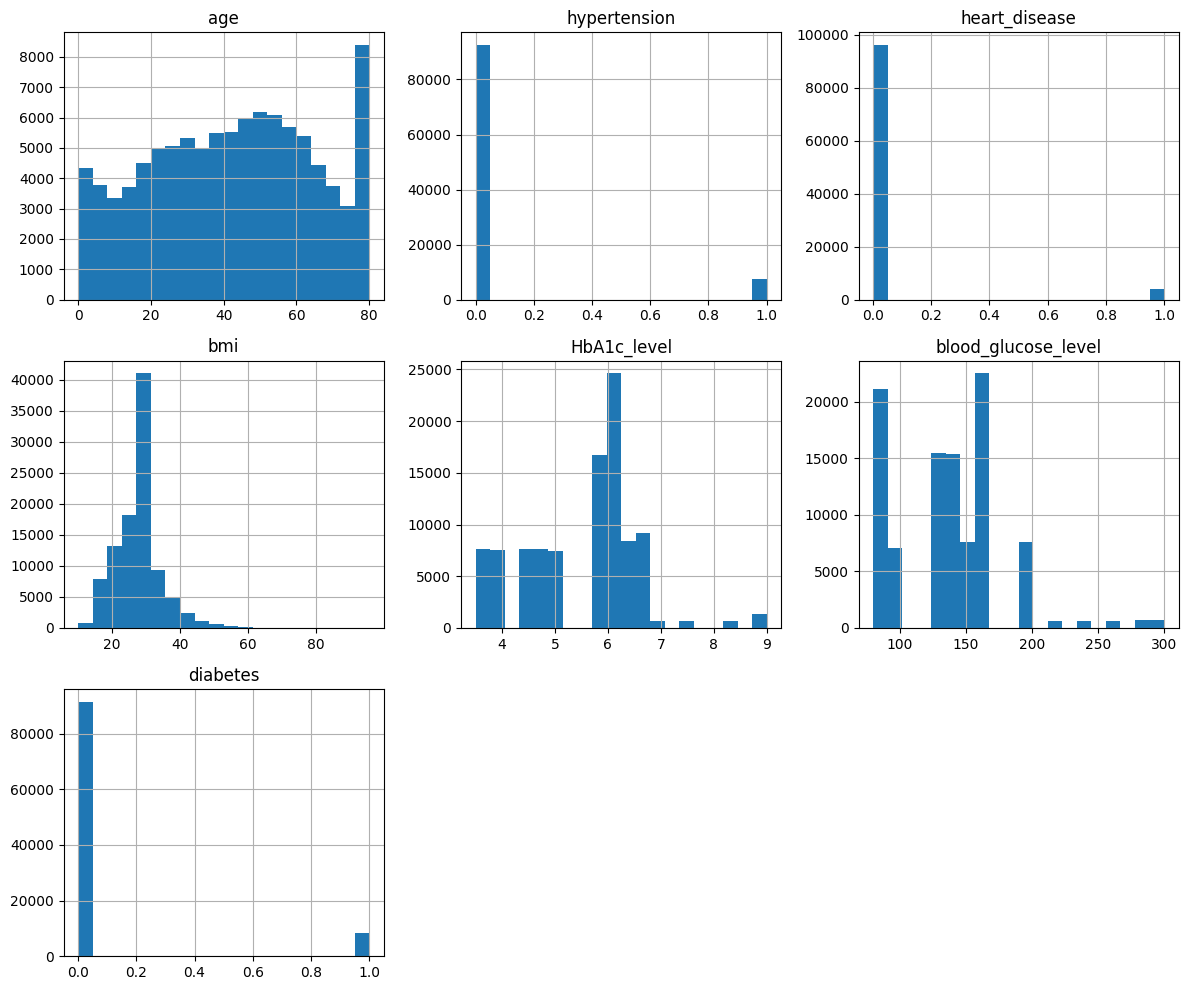

In [ ]:
# Explore distributions of numerical variables using histograms
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()


<ipython-input-15-6f9c57ce05cd>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


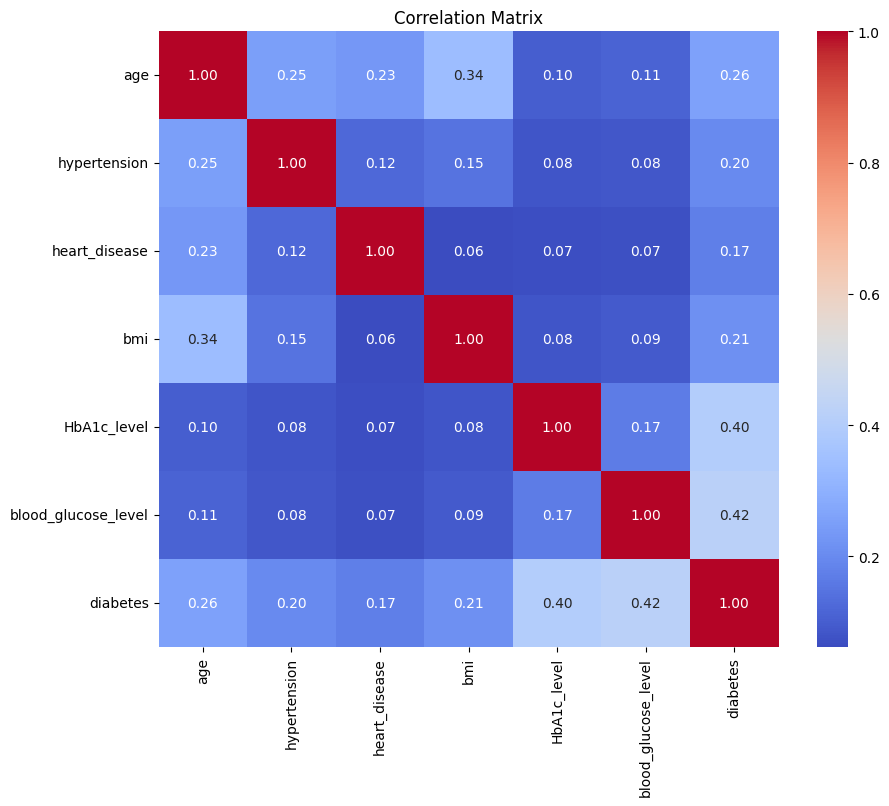

In [ ]:
# Step Explore correlation matrix for numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Encode categorical variables
# Use one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['gender', 'hypertension', 'heart_disease', 'smoking_history'])
df_encoded.head()

,age,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80,25.19,6.6,140,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,54,27.32,6.6,80,0,1,0,0,1,0,1,0,1,0,0,0,0,0
2,28,27.32,5.7,158,0,0,1,0,1,0,1,0,0,0,0,0,1,0
3,36,23.45,5.0,155,0,1,0,0,1,0,1,0,0,1,0,0,0,0
4,76,20.14,4.8,155,0,0,1,0,0,1,0,1,0,1,0,0,0,0


In [ ]:
import pandas as pd

# Assuming df_encoded is your DataFrame with one-hot encoded columns

# Gender columns blending
df_encoded['gender'] = df_encoded[['gender_Female', 'gender_Male', 'gender_Other']].idxmax(axis=1).apply(lambda x: x.split('_')[1])

# Hypertension columns blending
df_encoded['hypertension'] = df_encoded[['hypertension_0', 'hypertension_1']].idxmax(axis=1).apply(lambda x: int(x.split('_')[1]))

# Heart disease columns blending
heart_disease_mapping = {0: 'No', 1: 'Yes'}  # Mapping for heart disease categories
df_encoded['heart_disease'] = df_encoded['heart_disease_1'].map(heart_disease_mapping)

# Smoking history columns blending
smoking_history_cols = ['smoking_history_No Info', 'smoking_history_current', 'smoking_history_ever', 'smoking_history_former', 'smoking_history_never', 'smoking_history_not current']
df_encoded['smoking_history'] = df_encoded[smoking_history_cols].idxmax(axis=1).apply(lambda x: x.split('_')[2])

# Drop the one-hot encoded columns
df_encoded = df_encoded.drop(columns=['gender_Female', 'gender_Male', 'gender_Other',
                                      'hypertension_0', 'hypertension_1',
                                      'heart_disease_0', 'heart_disease_1'] + smoking_history_cols)

# Display the resulting DataFrame
df_encoded.head()


,age,bmi,HbA1c_level,blood_glucose_level,diabetes,gender,hypertension,heart_disease,smoking_history
0,80,25.19,6.6,140,0,Female,0,Yes,never
1,54,27.32,6.6,80,0,Female,0,No,No Info
2,28,27.32,5.7,158,0,Male,0,No,never
3,36,23.45,5.0,155,0,Female,0,No,current
4,76,20.14,4.8,155,0,Male,1,Yes,current


In [ ]:
df_encoded.columns

Index(['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes',
       'gender', 'hypertension', 'heart_disease', 'smoking_history'],
      dtype='object')

In [ ]:
# Scale numerical features
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Define numerical columns to be scaled
numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Scale numerical features
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Encode gender as binary (0 for Male, 1 for Female)
gender_mapping = {'Male': 0, 'Female': 1}
df_encoded['gender'] = df_encoded['gender'].map(gender_mapping)

# Convert 'gender' column to integer dtype
df_encoded['gender'] = df_encoded['gender'].astype('Int64')

# Encode smoking_history as binary (0 for not smoking, 1 for smoking)
smoking_categories = ['current', 'ever', 'former']
df_encoded['smoking_history'] = df_encoded['smoking_history'].apply(lambda x: 1 if x in smoking_categories else 0)

# Encode heart_disease as binary (0 for No, 1 for Yes)
heart_disease_mapping = {'No': 0, 'Yes': 1}
df_encoded['heart_disease'] = df_encoded['heart_disease'].map(heart_disease_mapping)

# Display the scaled DataFrame
df_encoded.head()


,age,bmi,HbA1c_level,blood_glucose_level,diabetes,gender,hypertension,heart_disease,smoking_history
0,1.000,0.177171,0.563636,0.272727,0,1,0,1,0
1,0.675,0.202031,0.563636,0.000000,0,1,0,0,0
2,0.350,0.202031,0.400000,0.354545,0,0,0,0,0
3,0.450,0.156863,0.272727,0.340909,0,1,0,0,1
4,0.950,0.118231,0.236364,0.340909,0,0,1,1,1


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  100000 non-null  float64
 1   bmi                  100000 non-null  float64
 2   HbA1c_level          100000 non-null  float64
 3   blood_glucose_level  100000 non-null  float64
 4   diabetes             100000 non-null  int64  
 5   gender               99982 non-null   Int64  
 6   hypertension         100000 non-null  int64  
 7   heart_disease        100000 non-null  int64  
 8   smoking_history      100000 non-null  int64  
dtypes: Int64(1), float64(4), int64(4)
memory usage: 7.0 MB


In [ ]:
# Drop rows with missing values
df_encoded.dropna(inplace=True)

# Check the information of the DataFrame after dropping missing values
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 99982 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  99982 non-null  float64
 1   bmi                  99982 non-null  float64
 2   HbA1c_level          99982 non-null  float64
 3   blood_glucose_level  99982 non-null  float64
 4   diabetes             99982 non-null  int64  
 5   gender               99982 non-null  Int64  
 6   hypertension         99982 non-null  int64  
 7   heart_disease        99982 non-null  int64  
 8   smoking_history      99982 non-null  int64  
dtypes: Int64(1), float64(4), int64(4)
memory usage: 7.7 MB


In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = df_encoded.drop('diabetes', axis=1)  # Features (X)
y = df_encoded['diabetes']  # Target variable (y)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)



Shape of X_train: (79985, 8)
Shape of X_test: (19997, 8)
Shape of y_train: (79985,)
Shape of y_test: (19997,)


In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 20: Model Training
# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the logistic regression model on the training data
log_reg.fit(X_train, y_train)

# Step 21: Model Evaluation
# Predict the labels for the testing set
y_pred = log_reg.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9592438865829874

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18222
           1       0.88      0.62      0.73      1775

    accuracy                           0.96     19997
   macro avg       0.92      0.81      0.85     19997
weighted avg       0.96      0.96      0.96     19997


Confusion Matrix:
[[18078   144]
 [  671  1104]]


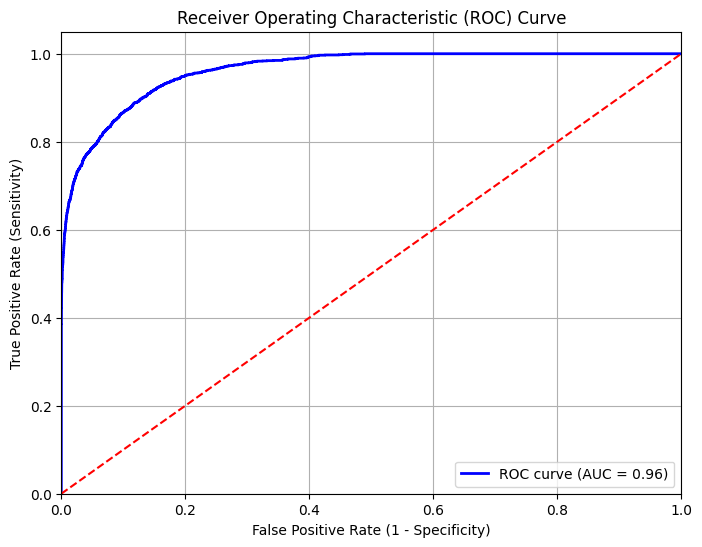

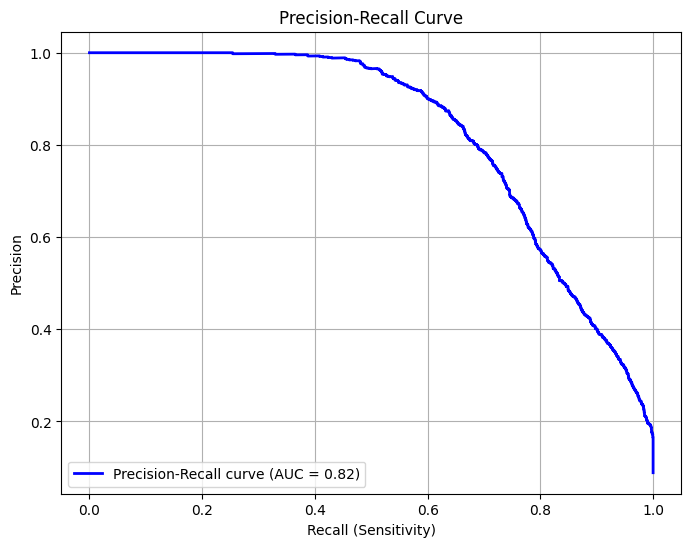

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Plot ROC Curve
# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Plot Precision-Recall Curve
# Calculate precision-recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, log_reg.predict_proba(X_test)[:, 1])

# Calculate area under the curve (AUC) for precision-recall curve
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Generate confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.9690453568035206

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18222
           1       0.95      0.69      0.80      1775

    accuracy                           0.97     19997
   macro avg       0.96      0.84      0.89     19997
weighted avg       0.97      0.97      0.97     19997


Confusion Matrix:
[[18155    67]
 [  552  1223]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred_dt = dt_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average=None)
recall_dt = recall_score(y_test, y_pred_dt, average=None)
f1_score_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Print evaluation metrics
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_dt)
print("Precision (Class 0):", precision_dt[0])
print("Precision (Class 1):", precision_dt[1])
print("Recall (Class 0):", recall_dt[0])
print("Recall (Class 1):", recall_dt[1])
print("F1-score (Weighted Average):", f1_score_dt)


Decision Tree Classifier:
Accuracy: 0.95259288893334
Precision (Class 0): 0.9745082957916712
Precision (Class 1): 0.7303621169916434
Recall (Class 0): 0.973438700471957
Recall (Class 1): 0.7385915492957746
F1-score (Weighted Average): 0.9527126666114758


In [ ]:
!pip install keras==3.1.1
!pip install tensorflow


  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.1.1
    Uninstalling keras-3.1.1:
      Successfully uninstalled keras-3.1.1


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json

# Assuming X_train, y_train, X_test, and y_test are already defined and converted to NumPy arrays

# Define the neural network architecture
model = Sequential()
model.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Save the model architecture as JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights
model.save_weights("model_weights.h5")

# Convert Pandas DataFrames to NumPy arrays for evaluation
X_test_np = X_test.values
y_test_np = y_test.values

# Evaluate the model using NumPy arrays
loss, accuracy = model.evaluate(X_test_np, y_test_np)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Load the model architecture from JSON
with open('model.json', 'r') as json_file:
    loaded_model_json = json_file.read()

# Load the model
loaded_model = model_from_json(loaded_model_json)

# Load the model weights
loaded_model.load_weights("model_weights.h5")


Epoch 1/20
2000/2000 [==============================] - 12s 5ms/step - loss: 0.1723 - accuracy: 0.9408 - val_loss: 0.1148 - val_accuracy: 0.9611
Epoch 2/20
2000/2000 [==============================] - 7s 3ms/step - loss: 0.1157 - accuracy: 0.9598 - val_loss: 0.1151 - val_accuracy: 0.9606
Epoch 3/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1148 - accuracy: 0.9599 - val_loss: 0.1137 - val_accuracy: 0.9617
Epoch 4/20
2000/2000 [==============================] - 7s 4ms/step - loss: 0.1136 - accuracy: 0.9605 - val_loss: 0.1114 - val_accuracy: 0.9619
Epoch 5/20
2000/2000 [==============================] - 7s 3ms/step - loss: 0.1113 - accuracy: 0.9618 - val_loss: 0.1089 - val_accuracy: 0.9639
Epoch 6/20
2000/2000 [==============================] - 7s 4ms/step - loss: 0.1094 - accuracy: 0.9635 - val_loss: 0.1091 - val_accuracy: 0.9635
Epoch 7/20
2000/2000 [==============================] - 6s 3ms/step - loss: 0.1083 - accuracy: 0.9636 - val_loss: 0.1066 - val_accuracy

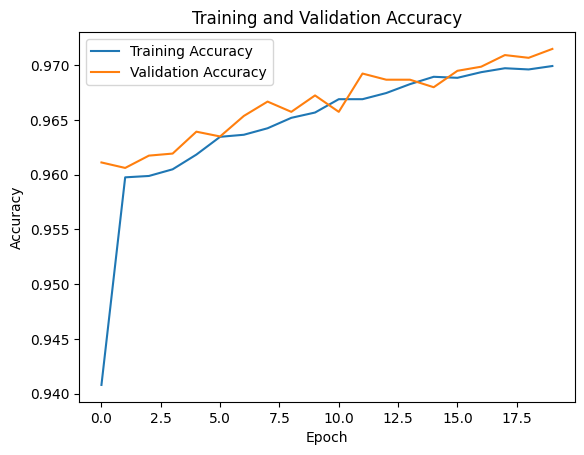

625/625 [==============================] - 5s 8ms/step - loss: 0.0923 - accuracy: 0.9698
Test Loss: 0.09230472147464752
Test Accuracy: 0.9698454737663269


In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
